<a href="https://colab.research.google.com/github/SeungbeomDo/Time_Series_Analysis/blob/main/Box_Jenkins_Method_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 및 라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSL/EDA2023-1/data_3651_20230120.csv', encoding = 'cp949')
data['일자'] = pd.to_datetime(data['일자'])
data = data.sort_values('일자')
data = data.reset_index(drop = True)
data = data[['일자', '종가']]
data.columns = ['Date', 'Close']
data['Return'] = np.log(data['Close']/data['Close'].shift(1))
data['Year'] = [x.year for x in data['Date']]
data = data.dropna()
data = data.reset_index(drop = True)
data

,Date,Close,Return,Year
0,1995-05-03,1596,0.033124,1995
1,1995-05-04,1583,-0.008179,1995
2,1995-05-06,1576,-0.004432,1995
3,1995-05-08,1564,-0.007643,1995
4,1995-05-09,1544,-0.012870,1995
...,...,...,...,...
7010,2023-01-16,61100,0.004922,2023
7011,2023-01-17,61000,-0.001638,2023
7012,2023-01-18,60400,-0.009885,2023
7013,2023-01-19,61500,0.018048,2023


#정상성 확인

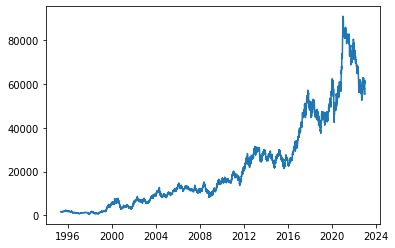

In [ ]:
plt.plot(data['Date'], data['Close'])

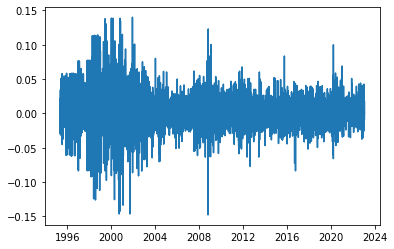

In [ ]:
plt.plot(data['Date'], data['Return'])

##ADF test: 귀무가설: 주어진 시계열은 비정상

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_result(ts):

  results = []

  for reg in ['nc', 'c', 'ct']:
    results.append(adfuller(ts, autolag = 'AIC', regression = '{}'.format(reg)))

  return pd.DataFrame({'type' : ['non', 'const', 'trend'], 'p_value' : [x[1] for x in results]})

In [ ]:
adfuller_result(data['Close'])

,type,p_value
0,non,0.885631
1,const,0.923139
2,trend,0.364253


In [ ]:
adfuller_result(data['Return'])

,type,p_value
0,non,4.038285e-29
1,const,2.133065e-30
2,trend,0.000000e+00


##KPSS 검정: 귀무가설: 주어진 시계열은 trend-stationary하다.

In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_result(ts):
  statistic, p_value, n_lags, critical_values = kpss(ts)
  print('stat : ', statistic)
  print('critical values : ', critical_values)

In [ ]:
kpss_result(data['Close'])

stat :  16.08559367680683
critical values :  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  """
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  store : bool


In [ ]:
kpss_result(data['Return'])

stat :  0.04373916866701228
critical values :  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  Returns


#자기상관함수, 편자기상관함수

###이론적인 패턴

Text(0.5, 1.0, 'PACF')

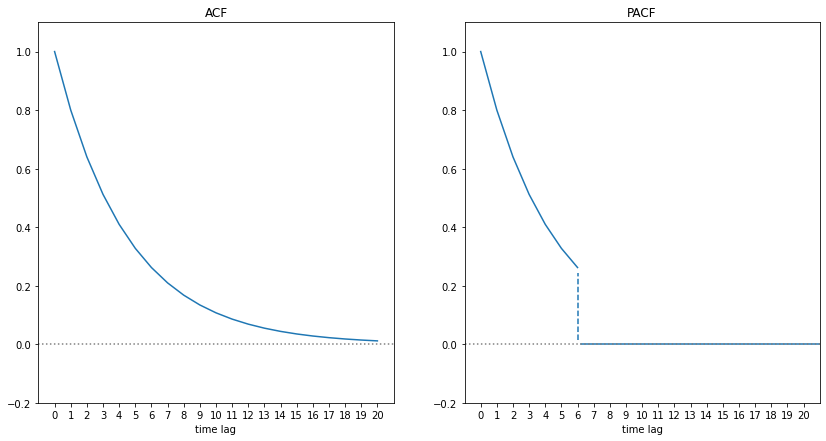

In [ ]:
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
k = np.arange(0, 21, 1)
phi = [0.8**k for k in k]
plt.plot(k, phi)
plt.xticks(k)
plt.xlabel('time lag')
plt.ylim(-0.2, 1.1)
plt.axhline(0, linestyle = ':', color = 'grey')
plt.title('ACF')

plt.subplot(1,2,2)
k = list(np.arange(0, 7, 1))
phi = [0.8**k for k in k]
plt.plot(k, phi)
plt.xlabel('time lag')
plt.xticks(np.arange(0, 21))
plt.ylim(-0.2, 1.1)
plt.xlim(-1, 21)
plt.axhline(0, xmin = 0.327, xmax = 1)
plt.axhline(0, linestyle = ':', color = 'grey')
plt.axvline(6, linestyle = '--', ymin = 0.165, ymax = 0.34)
plt.title('PACF')

Text(0.5, 1.0, 'PACF')

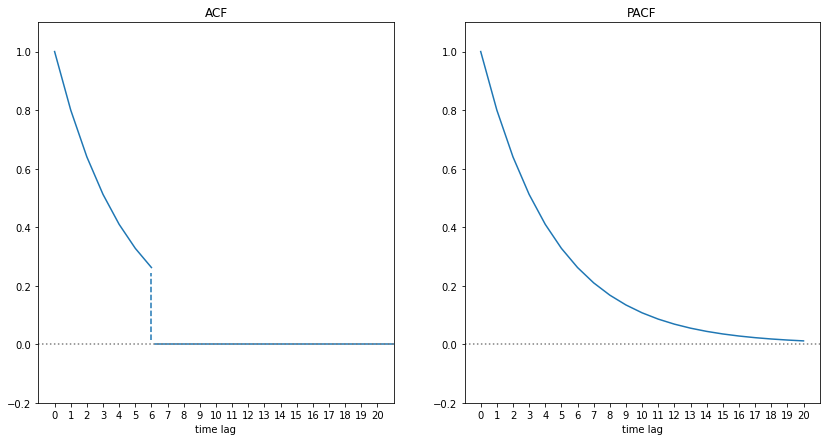

In [ ]:
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
k = list(np.arange(0, 7, 1))
phi = [0.8**k for k in k]
plt.plot(k, phi)
plt.xlabel('time lag')
plt.xticks(np.arange(0, 21))
plt.ylim(-0.2, 1.1)
plt.xlim(-1, 21)
plt.axhline(0, xmin = 0.327, xmax = 1)
plt.axhline(0, linestyle = ':', color = 'grey')
plt.axvline(6, linestyle = '--', ymin = 0.165, ymax = 0.34)
plt.title('ACF')

plt.subplot(1,2,2)


k = np.arange(0, 21, 1)
phi = [0.8**k for k in k]
plt.plot(k, phi)
plt.xticks(k)
plt.xlabel('time lag')
plt.ylim(-0.2, 1.1)
plt.axhline(0, linestyle = ':', color = 'grey')

plt.title('PACF')

Text(0.5, 1.0, 'PACF')

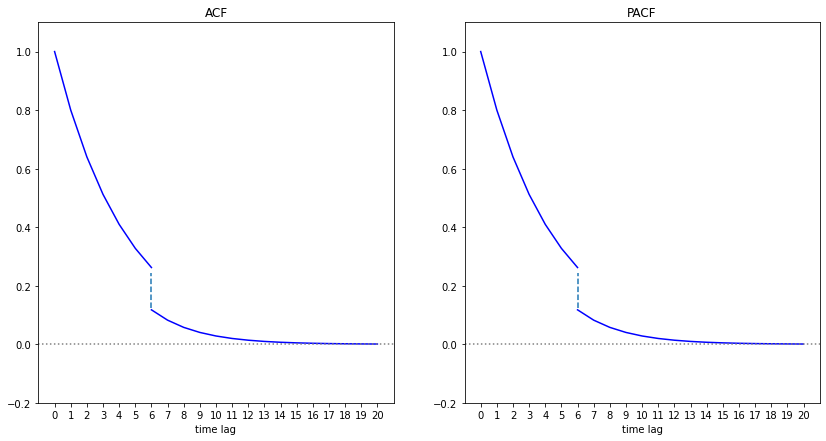

In [ ]:
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)

k = list(np.arange(0, 7, 1))
phi = [0.8**k for k in k]
j = list(np.arange(6, 21, 1))
sig = [0.7 ** j for j in j]

plt.plot(k, phi, color = 'b')
plt.plot(j, sig, color = 'b')
plt.xlabel('time lag')
plt.xticks(np.arange(0, 21))
plt.ylim(-0.2, 1.1)
plt.xlim(-1, 21)
plt.axhline(0, linestyle = ':', color = 'grey')
plt.axvline(6, linestyle = '--', ymin = 0.25, ymax = 0.34)
plt.title('ACF')

plt.subplot(1,2,2)

k = list(np.arange(0, 7, 1))
phi = [0.8**k for k in k]
j = list(np.arange(6, 21, 1))
sig = [0.7 ** j for j in j]

plt.plot(k, phi, color = 'b')
plt.plot(j, sig, color = 'b')
plt.xlabel('time lag')
plt.xticks(np.arange(0, 21))
plt.ylim(-0.2, 1.1)
plt.xlim(-1, 21)
plt.axhline(0, linestyle = ':', color = 'grey')
plt.axvline(6, linestyle = '--', ymin = 0.25, ymax = 0.34)
plt.title('PACF')


###실제 패턴

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  nlags = int_like(nlags, "nlags", optional=True)


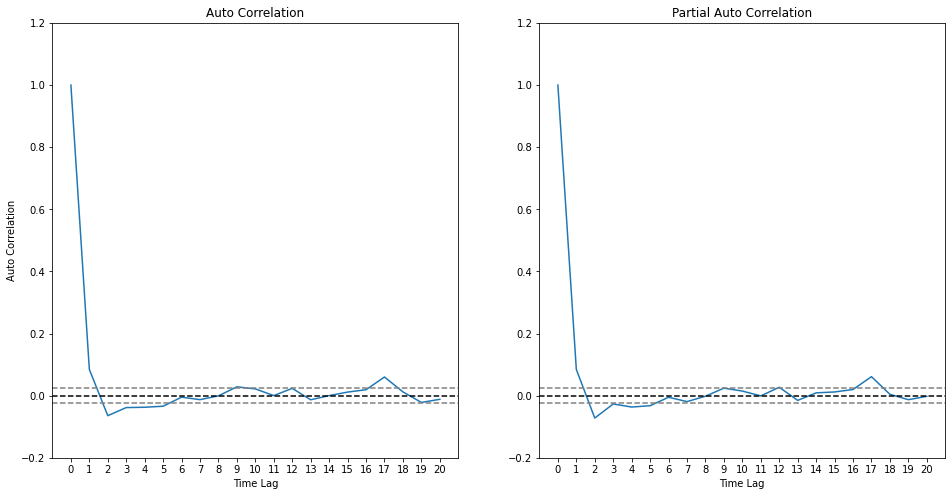

In [ ]:
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
lag_acf = acf(data['Return'], nlags=20)
plt.plot(np.arange(21), lag_acf)
plt.xticks(np.arange(21))
plt.ylim(-0.2, 1.2)
plt.axhline(0, color = 'black', linestyle = '--')
plt.axhline(y=-1.96/np.sqrt(len(data['Return'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['Return'])),linestyle='--',color='gray')
plt.title('Auto Correlation')
plt.xlabel('Time Lag')
plt.ylabel('Auto Correlation')

plt.subplot(1,2,2)
lag_pacf = pacf(data['Return'], nlags=20, method='ols')
plt.plot(np.arange(21), lag_pacf)
plt.xticks(np.arange(21))
plt.ylim(-0.2, 1.2)
plt.axhline(0, color = 'black', linestyle = '--')
plt.axhline(y=-1.96/np.sqrt(len(data['Return'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['Return'])),linestyle='--',color='gray')
plt.title('Partial Auto Correlation')
plt.xlabel('Time Lag')

plt.show()

#ARMA(2,1) 모델 구현

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(data['Return'], order=(2,0,1))
model_fit = model.fit(trend = 'nc')
model_fit.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 7015
Model:                     ARMA(2, 1)   Log Likelihood               15958.782
Method:                       css-mle   S.D. of innovations              0.025
Date:                Wed, 08 Feb 2023   AIC                         -31909.563
Time:                        10:59:27   BIC                         -31882.140
Sample:                             0   HQIC                        -31900.114
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.Return     0.6975      0.073      9.597      0.000       0.555       0.840
ar.L2.Return    -0.1202      0.012    -10.076      0.000      -0.144      -0.097
ma.L1.Return    -0.6114      0.073     -8.414      0.000      -0.754      -0.469
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5825           +0.0000j            2.5825            0.0000
AR.2            3.2225           +0.0000j            3.2225            0.0000
MA.1            1.6357           +0.0000j            1.6357            0.0000
-----------------------------------------------------------------------------
"""

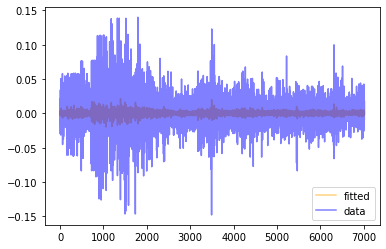

In [ ]:
plt.plot(model_fit.predict(), label = 'fitted', color = 'orange', alpha = 0.5)
plt.plot(data['Return'], label = 'data', color = 'blue', alpha = 0.5)
plt.legend()
plt.show()

#잔차 검정

In [ ]:
data['Fitted_Return'] = model_fit.predict()
data['Return_Error'] = data['Fitted_Return'] - data['Return']
data

,Date,Close,Return,Year,Fitted_Return,Return_Error
0,1995-05-03,1596,0.033124,1995,0.000000,-0.033124
1,1995-05-04,1583,-0.008179,1995,0.002813,0.010992
2,1995-05-06,1576,-0.004432,1995,-0.003016,0.001416
3,1995-05-08,1564,-0.007643,1995,-0.001245,0.006398
4,1995-05-09,1544,-0.012870,1995,-0.000891,0.011979
...,...,...,...,...,...,...
7010,2023-01-16,61100,0.004922,2023,-0.000241,-0.005163
7011,2023-01-17,61000,-0.001638,2023,-0.000318,0.001320
7012,2023-01-18,60400,-0.009885,2023,-0.000927,0.008958
7013,2023-01-19,61500,0.018048,2023,-0.001222,-0.019270


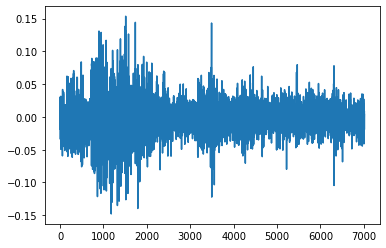

In [ ]:
plt.plot(data['Return_Error'])

In [ ]:
import statsmodels.api as sm

def LJ_result(ts):
  result = []
  for lag in np.arange(1, 11, 1):
    result.append(sm.stats.acorr_ljungbox(ts, lags=[lag])[1][0])

  return pd.DataFrame({'lag':np.arange(1,11,1), 'p_value':result})

LJ_result(data['Return_Error']).T

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


,0,1,2,3,4,5,6,7,8,9
lag,1.000000,2.00000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.00000,10.00000
p_value,0.996398,0.88017,0.621082,0.706784,0.474884,0.567776,0.618304,0.720336,0.29218,0.17853


In [ ]:
LJ_result(data['Return']).T

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


,0,1,2,3,4,5,6,7,8,9
lag,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01
p_value,1.451965e-12,6.307436e-18,2.777120e-19,1.399943e-20,1.468451e-21,6.680689e-21,1.717252e-20,7.073530e-20,1.864457e-20,1.464537e-20


#예측

In [ ]:
data['Close_shift'] = data['Close'].shift(1)
data['Fitted_Close'] = data['Close_shift'] * (1 + data['Fitted_Return'])
data

,Date,Close,Return,Year,Fitted_Return,Return_Error,Close_shift,Fitted_Close
0,1995-05-03,1596,0.033124,1995,0.000000,-0.033124,NaN,NaN
1,1995-05-04,1583,-0.008179,1995,0.002813,0.010992,1596.0,1600.489312
2,1995-05-06,1576,-0.004432,1995,-0.003016,0.001416,1583.0,1578.226268
3,1995-05-08,1564,-0.007643,1995,-0.001245,0.006398,1576.0,1574.037576
4,1995-05-09,1544,-0.012870,1995,-0.000891,0.011979,1564.0,1562.605793
...,...,...,...,...,...,...,...,...
7010,2023-01-16,61100,0.004922,2023,-0.000241,-0.005163,60800.0,60785.336202
7011,2023-01-17,61000,-0.001638,2023,-0.000318,0.001320,61100.0,61080.588912
7012,2023-01-18,60400,-0.009885,2023,-0.000927,0.008958,61000.0,60943.464038
7013,2023-01-19,61500,0.018048,2023,-0.001222,-0.019270,60400.0,60326.217702


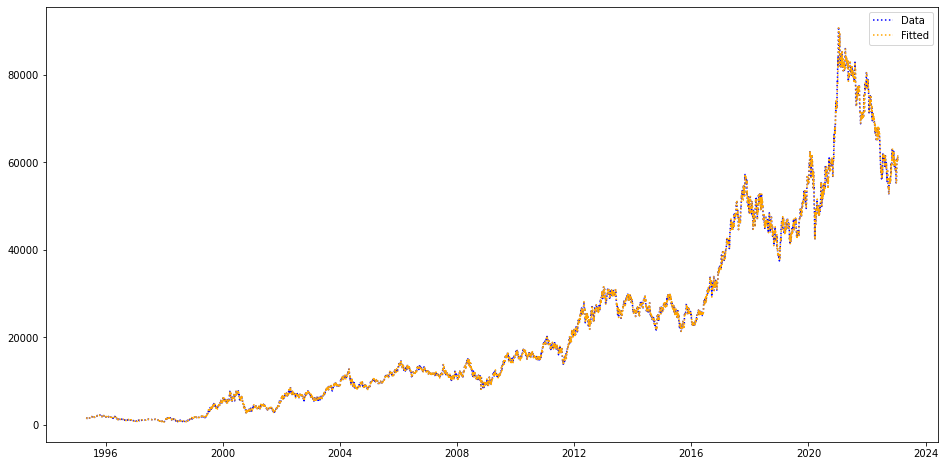

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(data['Date'], data['Close'], label = 'Data', color = 'blue', linestyle = ':')
plt.plot(data['Date'], data['Fitted_Close'], label = 'Fitted', color = 'orange', linestyle = ':')
plt.legend()
plt.show()

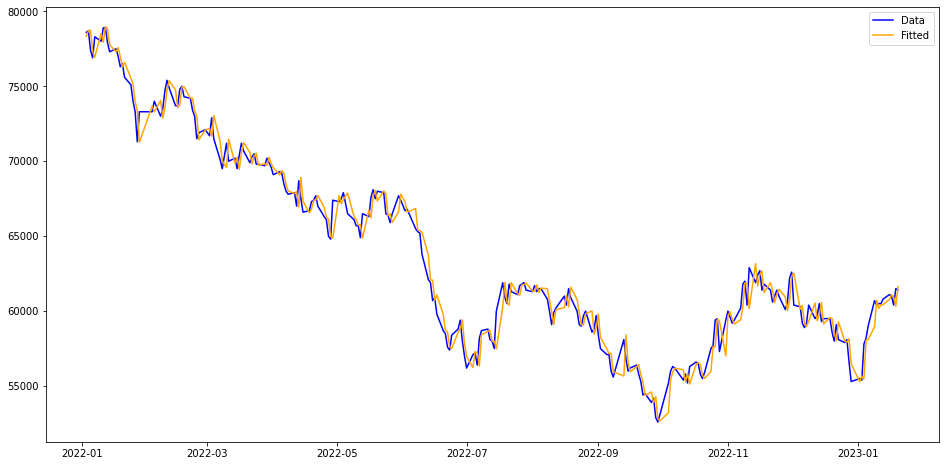

In [ ]:
data1 = data[data['Year'] >= 2022]
plt.figure(figsize = (16,8))
plt.plot(data1['Date'], data1['Close'], label = 'Data', color = 'blue')
plt.plot(data1['Date'], data1['Fitted_Close'], label = 'Fitted', color = 'orange')
plt.legend()
plt.show()

In [ ]:
data['Close_Error'] = data['Fitted_Close'] - data['Close']
data

,Date,Close,Return,Year,Fitted_Return,Return_Error,Close_shift,Fitted_Close,Close_Error
0,1995-05-03,1596,0.033124,1995,0.000000,-0.033124,NaN,NaN,NaN
1,1995-05-04,1583,-0.008179,1995,0.002813,0.010992,1596.0,1600.489312,17.489312
2,1995-05-06,1576,-0.004432,1995,-0.003016,0.001416,1583.0,1578.226268,2.226268
3,1995-05-08,1564,-0.007643,1995,-0.001245,0.006398,1576.0,1574.037576,10.037576
4,1995-05-09,1544,-0.012870,1995,-0.000891,0.011979,1564.0,1562.605793,18.605793
...,...,...,...,...,...,...,...,...,...
7010,2023-01-16,61100,0.004922,2023,-0.000241,-0.005163,60800.0,60785.336202,-314.663798
7011,2023-01-17,61000,-0.001638,2023,-0.000318,0.001320,61100.0,61080.588912,80.588912
7012,2023-01-18,60400,-0.009885,2023,-0.000927,0.008958,61000.0,60943.464038,543.464038
7013,2023-01-19,61500,0.018048,2023,-0.001222,-0.019270,60400.0,60326.217702,-1173.782298


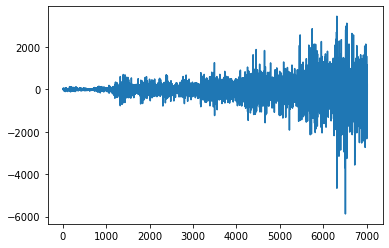

In [ ]:
plt.plot(data['Close_Error'])

In [ ]:
np.sqrt(np.mean(data['Close_Error']**2))

485.89105072658197

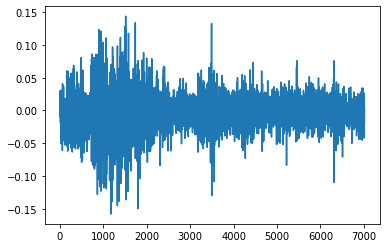

In [ ]:
plt.plot(data['Close_Error']/data['Close_shift'])

In [ ]:
np.sqrt(np.mean((data['Close_Error']/data['Close_shift'])**2))

0.024981561439835504

#Auto ARIMA

In [ ]:
!pip install pmdarima

import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data_auto = data.copy().iloc[:, :4]
data_auto.head(5)

,Date,Close,Return,Year
0,1995-05-03,1596,0.033124,1995
1,1995-05-04,1583,-0.008179,1995
2,1995-05-06,1576,-0.004432,1995
3,1995-05-08,1564,-0.007643,1995
4,1995-05-09,1544,-0.012870,1995


In [ ]:
model = pm.auto_arima(y = data_auto['Return']       # 데이터
                      , d = 0           # (d)차분 차수 (기본값 = none), 지정하지 않으면 실행 기간이 매우 길어질 수 있음
                      , start_p = 0     # (p)탐색 시초값 (기본값 = 2)
                      , max_p = 3       # (기본값 = 5)
                      , start_q = 0     # (q)탐색 시초값 (기본값 = 2)
                      , max_q = 3       # (기본값 = 5)
                      , m = 1           # (기본값 = 1)
                      , seasonal = False # 기본값 = True, 계절변동 ARIMA(SARIMA)에 해당시 True로 수정
                      , stepwise = True  
                      , trace=True      # stepwise로 모델을 적합할 때마다 결과를 프린트
                      )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-31812.072, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-31860.825, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-31867.997, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-31880.806, Time=1.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-31903.663, Time=1.67 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-31894.938, Time=0.82 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-31895.183, Time=1.40 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-31882.592, Time=7.75 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-31909.794, Time=7.73 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-31891.738, Time=3.19 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-31904.277, Time=2.51 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-31899.428, Time=3.26 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-31901.083, Time=5.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-31905.642, Time=10.66 sec

Bes

In [ ]:
model = ARIMA(data_auto['Return'], order=(1,0,2))
model_fit = model.fit(trend = 'nc')
model_fit.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 7015
Model:                     ARMA(1, 2)   Log Likelihood               15958.897
Method:                       css-mle   S.D. of innovations              0.025
Date:                Wed, 08 Feb 2023   AIC                         -31909.795
Time:                        11:00:24   BIC                         -31882.372
Sample:                             0   HQIC                        -31900.346
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.Return     0.5905      0.070      8.491      0.000       0.454       0.727
ma.L1.Return    -0.5039      0.070     -7.247      0.000      -0.640      -0.368
ma.L2.Return    -0.1197      0.012    -10.124      0.000      -0.143      -0.097
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6934           +0.0000j            1.6934            0.0000
MA.1            1.4708           +0.0000j            1.4708            0.0000
MA.2           -5.6809           +0.0000j            5.6809            0.5000
-----------------------------------------------------------------------------
"""

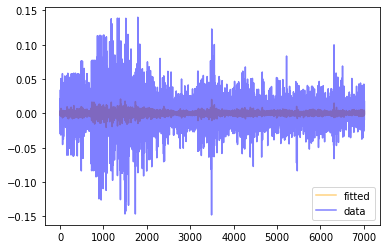

In [ ]:
plt.plot(model_fit.predict(), label = 'fitted', color = 'orange', alpha = 0.5)
plt.plot(data_auto['Return'], label = 'data', color = 'blue', alpha = 0.5)
plt.legend()
plt.show()

##잔차 검정

In [ ]:
data_auto['Fitted_Return'] = model_fit.predict()
data_auto['Return_Error'] = data_auto['Fitted_Return'] - data_auto['Return']
data_auto

,Date,Close,Return,Year,Fitted_Return,Return_Error
0,1995-05-03,1596,0.033124,1995,0.000000,-0.033124
1,1995-05-04,1583,-0.008179,1995,0.002774,0.010953
2,1995-05-06,1576,-0.004432,1995,-0.003256,0.001176
3,1995-05-08,1564,-0.007643,1995,-0.000725,0.006918
4,1995-05-09,1544,-0.012870,1995,-0.000892,0.011978
...,...,...,...,...,...,...
7010,2023-01-16,61100,0.004922,2023,-0.000258,-0.005180
7011,2023-01-17,61000,-0.001638,2023,-0.000430,0.001208
7012,2023-01-18,60400,-0.009885,2023,-0.000978,0.008906
7013,2023-01-19,61500,0.018048,2023,-0.001205,-0.019253


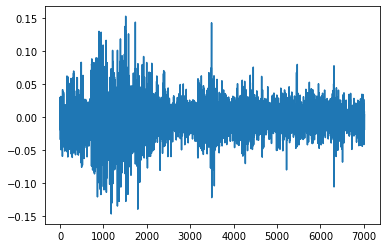

In [ ]:
plt.plot(data_auto['Return_Error'])

In [ ]:
import statsmodels.api as sm

def LJ_result(ts):
  result = []
  for lag in np.arange(1, 11, 1):
    result.append(sm.stats.acorr_ljungbox(ts, lags=[lag])[1][0])

  return pd.DataFrame({'lag':np.arange(1,11,1), 'p_value':result})

LJ_result(data_auto['Return_Error']).T

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


,0,1,2,3,4,5,6,7,8,9
lag,1.000000,2.000000,3.000000,4.000000,5.000000,6.00000,7.00000,8.000000,9.000000,10.000000
p_value,0.993477,0.974885,0.994085,0.922018,0.648926,0.71785,0.77499,0.849571,0.363144,0.202641


##예측

In [ ]:
data_auto['Close_shift'] = data_auto['Close'].shift(1)
data_auto['Fitted_Close'] = data_auto['Close_shift'] * (1 + data_auto['Fitted_Return'])
data_auto

,Date,Close,Return,Year,Fitted_Return,Return_Error,Close_shift,Fitted_Close
0,1995-05-03,1596,0.033124,1995,0.000000,-0.033124,NaN,NaN
1,1995-05-04,1583,-0.008179,1995,0.002774,0.010953,1596.0,1600.427982
2,1995-05-06,1576,-0.004432,1995,-0.003256,0.001176,1583.0,1577.846419
3,1995-05-08,1564,-0.007643,1995,-0.000725,0.006918,1576.0,1574.857367
4,1995-05-09,1544,-0.012870,1995,-0.000892,0.011978,1564.0,1562.605327
...,...,...,...,...,...,...,...,...
7010,2023-01-16,61100,0.004922,2023,-0.000258,-0.005180,60800.0,60784.336866
7011,2023-01-17,61000,-0.001638,2023,-0.000430,0.001208,61100.0,61073.731745
7012,2023-01-18,60400,-0.009885,2023,-0.000978,0.008906,61000.0,60940.311539
7013,2023-01-19,61500,0.018048,2023,-0.001205,-0.019253,60400.0,60327.206284


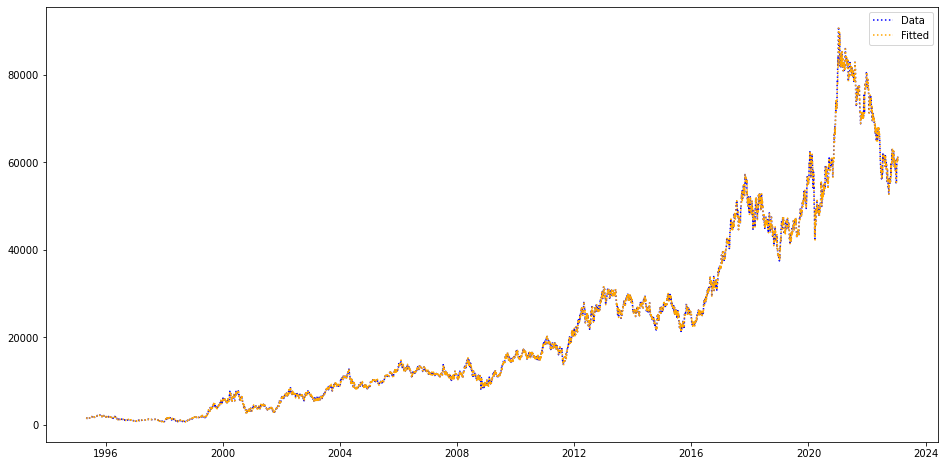

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(data_auto['Date'], data_auto['Close'], label = 'Data', color = 'blue', linestyle = ':')
plt.plot(data_auto['Date'], data_auto['Fitted_Close'], label = 'Fitted', color = 'orange', linestyle = ':')
plt.legend()
plt.show()

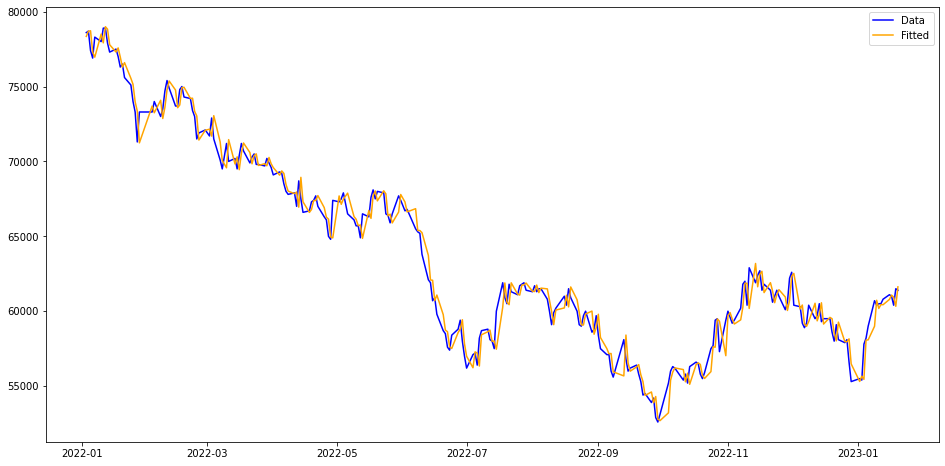

In [ ]:
data_auto1 = data_auto[data_auto['Year'] >= 2022]
plt.figure(figsize = (16,8))
plt.plot(data_auto1['Date'], data_auto1['Close'], label = 'Data', color = 'blue')
plt.plot(data_auto1['Date'], data_auto1['Fitted_Close'], label = 'Fitted', color = 'orange')
plt.legend()
plt.show()

In [ ]:
data_auto['Close_Error'] = data_auto['Fitted_Close'] - data_auto['Close']
data_auto

,Date,Close,Return,Year,Fitted_Return,Return_Error,Close_shift,Fitted_Close,Close_Error
0,1995-05-03,1596,0.033124,1995,0.000000,-0.033124,NaN,NaN,NaN
1,1995-05-04,1583,-0.008179,1995,0.002774,0.010953,1596.0,1600.427982,17.427982
2,1995-05-06,1576,-0.004432,1995,-0.003256,0.001176,1583.0,1577.846419,1.846419
3,1995-05-08,1564,-0.007643,1995,-0.000725,0.006918,1576.0,1574.857367,10.857367
4,1995-05-09,1544,-0.012870,1995,-0.000892,0.011978,1564.0,1562.605327,18.605327
...,...,...,...,...,...,...,...,...,...
7010,2023-01-16,61100,0.004922,2023,-0.000258,-0.005180,60800.0,60784.336866,-315.663134
7011,2023-01-17,61000,-0.001638,2023,-0.000430,0.001208,61100.0,61073.731745,73.731745
7012,2023-01-18,60400,-0.009885,2023,-0.000978,0.008906,61000.0,60940.311539,540.311539
7013,2023-01-19,61500,0.018048,2023,-0.001205,-0.019253,60400.0,60327.206284,-1172.793716


In [ ]:
np.sqrt(np.mean((data_auto['Close_Error']/data_auto['Close'])**2))

0.024833381314288604

#test set 분리하고 검증

In [ ]:
data_train = data[data['Year']<2022]
data_test = data[data['Year']>=2022]

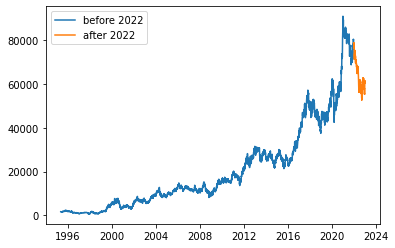

In [ ]:
plt.plot(data_train['Date'], data_train['Close'], label = 'before 2022')
plt.plot(data_test['Date'], data_test['Close'], label = 'after 2022')
plt.legend()

In [ ]:
model = pm.auto_arima(y = data_train['Return']       # 데이터
                      , d = 0           # (d)차분 차수 (기본값 = none), 지정하지 않으면 실행 기간이 매우 길어질 수 있음
                      , start_p = 0     # (p)탐색 시초값 (기본값 = 2)
                      , max_p = 3       # (기본값 = 5)
                      , start_q = 0     # (q)탐색 시초값 (기본값 = 2)
                      , max_q = 3       # (기본값 = 5)
                      , m = 1           # (기본값 = 1)
                      , seasonal = False # 기본값 = True, 계절변동 ARIMA(SARIMA)에 해당시 True로 수정
                      , stepwise = True  
                      , trace=True      # stepwise로 모델을 적합할 때마다 결과를 프린트
                      )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-30455.464, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-30504.045, Time=0.40 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-30511.142, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-30523.079, Time=2.88 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-30545.623, Time=3.92 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-30536.643, Time=2.46 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-30536.987, Time=1.81 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-30524.452, Time=7.44 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-30551.311, Time=7.71 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-30533.347, Time=2.20 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-30545.353, Time=1.27 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-30541.094, Time=2.78 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-30542.604, Time=4.73 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-30546.834, Time=8.14 sec

Best

In [ ]:
model = ARIMA(data_train['Return'], order=(1,0,2))
model_fit = model.fit(trend = 'nc')
model_fit.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 6754
Model:                     ARMA(1, 2)   Log Likelihood               15279.656
Method:                       css-mle   S.D. of innovations              0.025
Date:                Wed, 08 Feb 2023   AIC                         -30551.312
Time:                        11:01:13   BIC                         -30524.040
Sample:                             0   HQIC                        -30541.897
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.Return     0.5956      0.070      8.548      0.000       0.459       0.732
ma.L1.Return    -0.5075      0.070     -7.286      0.000      -0.644      -0.371
ma.L2.Return    -0.1207      0.012    -10.032      0.000      -0.144      -0.097
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6791           +0.0000j            1.6791            0.0000
MA.1            1.4620           +0.0000j            1.4620            0.0000
MA.2           -5.6653           +0.0000j            5.6653            0.5000
-----------------------------------------------------------------------------
"""

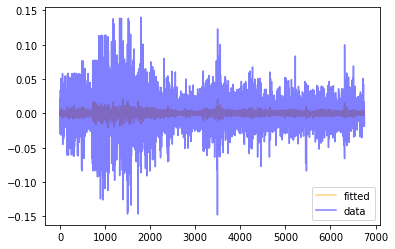

In [ ]:
plt.plot(model_fit.predict(), label = 'fitted', color = 'orange', alpha = 0.5)
plt.plot(data_train['Return'], label = 'data', color = 'blue', alpha = 0.5)
plt.legend()
plt.show()

##잔차 검정

In [ ]:
data_train['Fitted_Return'] = model_fit.predict()
data_train['Return_Error'] = data_train['Fitted_Return'] - data_train['Return']
data_train

<ipython-input-198-37b511f0d17b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Fitted_Return'] = model_fit.predict()
<ipython-input-198-37b511f0d17b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Return_Error'] = data_train['Fitted_Return'] - data_train['Return']


,Date,Close,Return,Year,Fitted_Return,Return_Error,Close_shift,Fitted_Close,Close_Error
0,1995-05-03,1596,0.033124,1995,0.000000,-0.033124,NaN,NaN,NaN
1,1995-05-04,1583,-0.008179,1995,0.002818,0.010997,1596.0,1600.489312,17.489312
2,1995-05-06,1576,-0.004432,1995,-0.003269,0.001163,1583.0,1578.226268,2.226268
3,1995-05-08,1564,-0.007643,1995,-0.000733,0.006910,1576.0,1574.037576,10.037576
4,1995-05-09,1544,-0.012870,1995,-0.000910,0.011961,1564.0,1562.605793,18.605793
...,...,...,...,...,...,...,...,...,...
6749,2021-12-24,80500,0.007481,2021,-0.000923,-0.008404,79900.0,79826.382247,-673.617753
6750,2021-12-27,80200,-0.003734,2021,-0.000495,0.003239,80500.0,80445.826794,245.826794
6751,2021-12-28,80300,0.001246,2021,-0.001594,-0.002841,80200.0,80069.103691,-230.896309
6752,2021-12-29,78800,-0.018857,2021,-0.000308,0.018548,80300.0,80264.522409,1464.522409


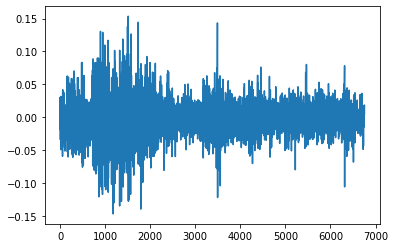

In [ ]:
plt.plot(data_train['Return_Error'])

In [ ]:
import statsmodels.api as sm

def LJ_result(ts):
  result = []
  for lag in np.arange(1, 11, 1):
    result.append(sm.stats.acorr_ljungbox(ts, lags=[lag])[1][0])

  return pd.DataFrame({'lag':np.arange(1,11,1), 'p_value':result})

LJ_result(data_train['Return_Error']).T

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


,0,1,2,3,4,5,6,7,8,9
lag,1.00000,2.000000,3.000000,4.000000,5.000000,6.00000,7.000000,8.000000,9.000000,10.000000
p_value,0.99196,0.972016,0.995498,0.931149,0.677205,0.75679,0.813734,0.880782,0.464235,0.248801


##예측

In [ ]:
pred = model_fit.predict(start = len(data_train), end = len(data)-1)
pred

6754    5.827094e-04
6755    8.547863e-04
6756    5.090788e-04
6757    3.031883e-04
6758    1.805676e-04
            ...     
7010    3.454230e-61
7011    2.057210e-61
7012    1.225197e-61
7013    7.296818e-62
7014    4.345712e-62
Length: 261, dtype: float64

In [ ]:
pred_cumprod = (pred + 1).cumprod()
pred_cumprod

6754    1.000583
6755    1.001438
6756    1.001948
6757    1.002252
6758    1.002433
          ...   
7010    1.002699
7011    1.002699
7012    1.002699
7013    1.002699
7014    1.002699
Length: 261, dtype: float64

In [ ]:
pred_close = list(data_train['Close'])[-1] * pred_cumprod
pred_close

6754    78345.626150
6755    78412.594920
6756    78452.513108
6757    78476.298992
6758    78490.469269
            ...     
7010    78511.341843
7011    78511.341843
7012    78511.341843
7013    78511.341843
7014    78511.341843
Length: 261, dtype: float64

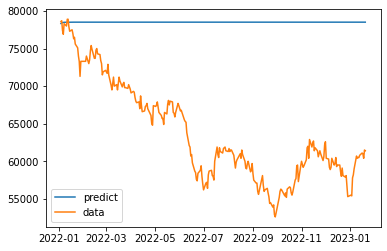

In [ ]:
plt.plot(data_test['Date'], pred_close, label = 'predict')
plt.plot(data_test['Date'], data_test['Close'], label = 'data')
plt.legend()

##찐 백테스팅

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 6754
Model:                     ARMA(1, 2)   Log Likelihood               15279.656
Method:                       css-mle   S.D. of innovations              0.025
Date:                Wed, 08 Feb 2023   AIC                         -30551.312
Time:                        11:01:14   BIC                         -30524.040
Sample:                             0   HQIC                        -30541.897
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.Return     0.5956      0.070      8.548      0.000       0.459       0.732
ma.L1.Return    -0.5075      0.070     -7.286      0.000      -0.644      -0.371
ma.L2.Return    -0.1207      0.012    -10.032      0.000      -0.144      -0.097
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6791           +0.0000j            1.6791            0.0000
MA.1            1.4620           +0.0000j            1.4620            0.0000
MA.2           -5.6653           +0.0000j            5.6653            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
data_bt = data.copy().iloc[:, :3]
data_bt['Return_estimated'] = model_fit.predict()

data_bt['Resid'] = data_bt['Return'] - data_bt['Return_estimated']
data_bt['Return_t-1'] = data_bt['Return'].shift(1)
data_bt['Resid_t-1'] = data_bt['Resid'].shift(1)
data_bt['Resid_t-2'] = data_bt['Resid'].shift(2)

for i in np.arange(len(data_train)-1, len(data_bt)):
  est_return = 0.5956 * list(data_bt['Return_t-1'])[i] - 0.5075 * list(data_bt['Resid_t-1'])[i] - 0.1207 * list(data_bt['Resid_t-2'])[i]
  data_bt.iloc[i, 3] = est_return

  data_bt['Resid'] = data_bt['Return'] - data_bt['Return_estimated']
  data_bt['Return_t-1'] = data_bt['Return'].shift(1)
  data_bt['Resid_t-1'] = data_bt['Resid'].shift(1)
  data_bt['Resid_t-2'] = data_bt['Resid'].shift(2)

data_bt['Close_estimated'] = data_bt['Close'].shift(1) * (1 + data_bt['Return_estimated'])
data_bt

,Date,Close,Return,Return_estimated,Resid,Return_t-1,Resid_t-1,Resid_t-2,Close_estimated
0,1995-05-03,1596,0.033124,0.000000,0.033124,NaN,NaN,NaN,NaN
1,1995-05-04,1583,-0.008179,0.002818,-0.010997,0.033124,0.033124,NaN,1600.497674
2,1995-05-06,1576,-0.004432,-0.003269,-0.001163,-0.008179,-0.010997,0.033124,1577.825686
3,1995-05-08,1564,-0.007643,-0.000733,-0.006910,-0.004432,-0.001163,-0.010997,1574.844771
4,1995-05-09,1544,-0.012870,-0.000910,-0.011961,-0.007643,-0.006910,-0.001163,1562.577500
...,...,...,...,...,...,...,...,...,...
7010,2023-01-16,61100,0.004922,-0.000263,0.005185,0.004946,0.006085,0.000999,60784.039450
7011,2023-01-17,61000,-0.001638,-0.000434,-0.001204,0.004922,0.005185,0.006085,61073.482016
7012,2023-01-18,60400,-0.009885,-0.000990,-0.008894,-0.001638,-0.001204,0.005185,60939.588809
7013,2023-01-19,61500,0.018048,-0.001228,0.019276,-0.009885,-0.008894,-0.001204,60325.821147


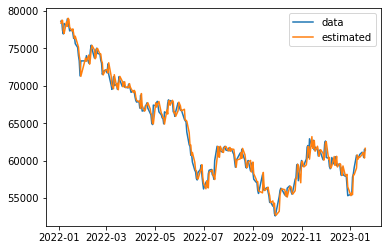

In [ ]:
data_bt['Year'] = [x.year for x in data_bt['Date']]
data_bt_2022 = data_bt[data_bt['Year'] >= 2022]

plt.plot(data_bt_2022['Date'], data_bt_2022['Close'], label = 'data')
plt.plot(data_bt_2022['Date'], data_bt_2022['Close_estimated'], label = 'estimated')
plt.legend()

In [ ]:
data_bt['Close_error'] = data_bt['Close'] - data_bt['Close_estimated']
np.sqrt(np.mean((data_bt['Close_error']/data_bt['Close'])**2))

0.02483349671986242